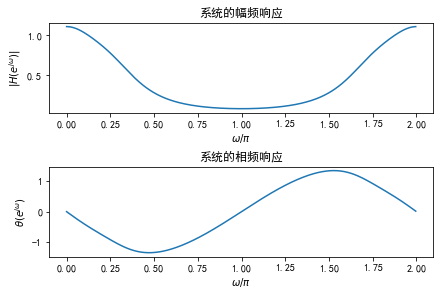

In [75]:
#导入使用的库
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

#系统的频率响应
b = np.array([0.3,0.06]) #分子
a = np.array([1,-1.1,0.55,-0.125]) #分母
w,H = signal.freqz(b,a,whole=True)

#系统的零极点图
z,p,_ = signal.tf2zpk(b,a)

#系统的单位脉冲响应
delta = signal.unit_impulse(30)
zi = signal.lfilter_zi(b,a)*0 #系统初始零状态
z1,_ = signal.lfilter(b,a,delta,zi=zi) #系统输出

#绘制信号与系统的响应图
fig,ax = plt.subplots(2,1,constrained_layout=True)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来显示负号
ax[0].plot(w/np.pi,np.abs(H))
ax[0].set_title("系统的幅频响应")
ax[0].set_xlabel('$\omega / \pi$');ax[0].set_ylabel('$|H(e^{j\omega})|$')
ax[1].plot(w/np.pi,np.angle(H))
ax[1].set_title("系统的相频响应")
ax[1].set_xlabel('$\omega / \pi$');ax[1].set_ylabel(r'$ \theta (e^{j\omega})$')
fig.savefig('./discrete_sys_freq_domain.png',dpi=500)

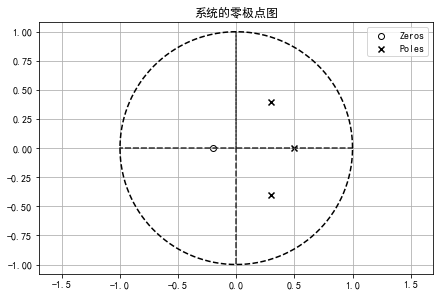

In [58]:
xt = np.linspace(0, 2*np.pi, 401)

fig,ax = plt.subplots(constrained_layout=True)
ax.plot(np.cos(xt),np.sin(xt),'k--')  #绘制单位圆
ax.plot(np.cos(xt),np.cos(xt)*0,'k--',alpha=0.6)
ax.plot(np.sin(xt)*0,np.sin(xt),'k--',alpha=0.6)
ax.scatter(z.real,z.imag,c='w',marker='o',edgecolors='black',label='Zeros')
ax.scatter(p.real,p.imag,c='black',marker='x',label='Poles')
ax.axis("equal");ax.grid();ax.legend()
ax.set_title("系统的零极点图")
fig.savefig('./discrete_sys_z_plane.png',dpi=500)

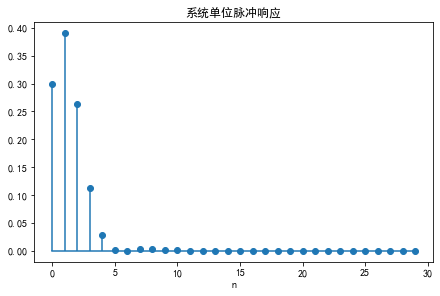

In [74]:
fig,ax = plt.subplots(constrained_layout=True)
ax.stem(z1,basefmt="")
ax.set_title("系统单位脉冲响应");ax.set_xlabel('n')
fig.savefig('./discrete_sys_impulse.png',dpi=500)